In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_excel('Online Retail.xlsx')

In [29]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [30]:
df.shape

(541909, 8)

In [31]:
country_cust_data = df[['Country', 'CustomerID']].drop_duplicates()

In [32]:
country_cust_data.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [33]:
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [34]:
df = df.query("Country=='United Kingdom'").reset_index(drop=True)
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [35]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [36]:
df = df[pd.notnull(df['CustomerID'])]

In [37]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [38]:
df.Quantity.min()

-80995

In [39]:
df.UnitPrice.min()

0.0

In [40]:
df = df[(df['Quantity']>0)]

In [41]:
df.Quantity.min()

1

In [42]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [46]:
df['InvoiceDate'].dtypes

dtype('<M8[ns]')

In [48]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [49]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [50]:
df.shape

(354345, 9)

In [51]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [53]:
df.InvoiceDate.max()

Timestamp('2011-12-09 12:49:00')

In [52]:
import datetime as dt

In [55]:
latest_Date = dt.datetime(2011,12,10)

In [63]:
RFMScores = df.groupby('CustomerID').agg({'InvoiceDate':lambda x: (latest_Date - x.max()).days, 'InvoiceNo':lambda x:len(x), 'TotalAmount': lambda x: x.sum()})

In [64]:
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

In [65]:
RFMScores.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalAmount': 'Monetary_Value'}, inplace=True)
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary_Value
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [66]:
RFMScores.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

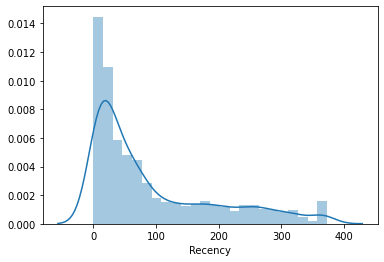

In [67]:
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)

In [68]:
RFMScores.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

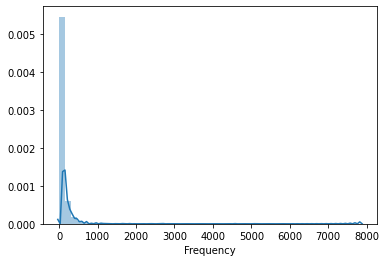

In [69]:
x = RFMScores['Frequency']

ax = sns.distplot(x)

In [73]:
RFMScores.Monetary_Value.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary_Value, dtype: float64

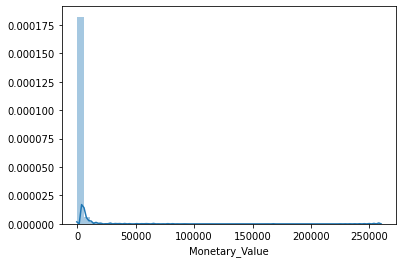

In [75]:
x = RFMScores['Monetary_Value']
ax = sns.distplot(x)

In [76]:
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [77]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary_Value': {0.25: 300.03999999999996,
  0.5: 651.8199999999999,
  0.75: 1575.89}}

In [78]:
def RScoring(x,p,d):
        if x<=d[p][0.25]:
            return 1
        elif x <=d[p][0.50]:
            return 2
        elif x<=d[p][0.75]:
            return 3
        else:
            return 4
        
def FnMScoring(x,p,d):
    if x<= d[p][0.25]:
        return 4
    elif x <=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [79]:
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency', quantiles))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency', quantiles))
RFMScores['M'] = RFMScores['Monetary_Value'].apply(FnMScoring, args=('Monetary_Value', quantiles))


In [80]:
RFMScores.head()

,Recency,Frequency,Monetary_Value,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [81]:
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


In [82]:
loyalty_level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q =4, labels = loyalty_level)
RFMScores['RFM_loyalty_level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary_Value,R,F,M,RFMGroup,RFMScore,RFM_loyalty_level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum


In [83]:
 RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary_Value', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary_Value,R,F,M,RFMGroup,RFMScore,RFM_loyalty_level
0,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
1,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
2,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
3,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
4,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
5,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
6,15311.0,0,2379,60767.90,1,1,1,111,3,Platinum
7,13089.0,2,1818,58825.83,1,1,1,111,3,Platinum
8,15769.0,7,130,56252.72,1,1,1,111,3,Platinum
9,15061.0,3,403,54534.14,1,1,1,111,3,Platinum
